In [49]:
import csv
import operator
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

(1800.0, 2022.0)

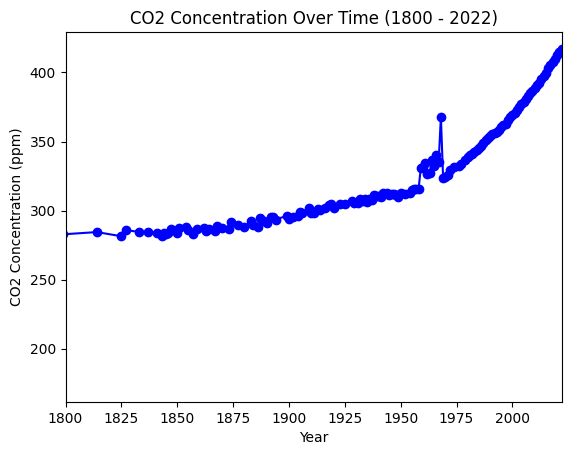

In [50]:
co2_df = pd.read_csv('../datasets/co2-long-term-concentration.csv')
year_column = 'Year'
co2_concentration_column = 'Long-run CO₂ concentration'

plt.plot(co2_df[year_column], co2_df[co2_concentration_column], marker='o', linestyle='-', color='b')
plt.title('CO2 Concentration Over Time (1800 - 2022)')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.xlim(left=1800)
plt.xlim(right=co2_df[year_column].max())

Mean Squared Error: 13.820608083774003


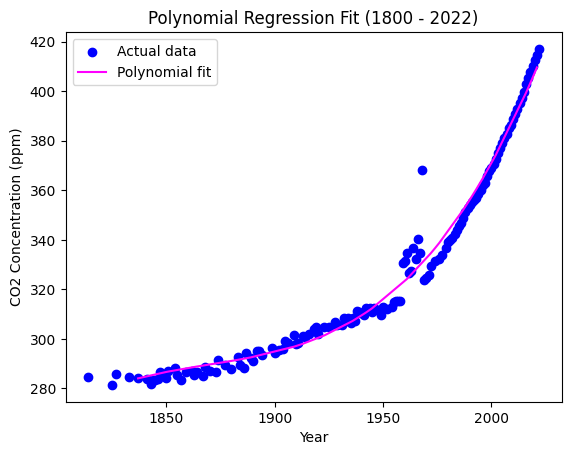

In [51]:
filtered_df = co2_df[co2_df[year_column] >= 1800]

X = filtered_df[year_column].values.reshape(-1, 1)
y = filtered_df[co2_concentration_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

sorted_zip = sorted(zip(X_test, y_pred), key=lambda x: x[0])
X_test_sorted, y_pred_sorted = zip(*sorted_zip)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_test_sorted, y_pred_sorted, color='magenta', label='Polynomial fit')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Polynomial Regression Fit (1800 - 2022)')
plt.legend()
plt.show()

In [52]:
future_years = np.arange(2024, 2125).reshape(-1, 1)

future_years_poly = poly.transform(future_years)

predicted_co2 = model.predict(future_years_poly)

predictions_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted CO2': predicted_co2.flatten()
})

csv_file_path = 'predicted_co2_concentrations_2024_2124.csv'
predictions_df.to_csv(csv_file_path, index=False)